In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv', index_col='PassengerId')
test_df = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv', index_col='PassengerId')

In [3]:
train_df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True


In [4]:
test_df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
PassengerId,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


In [6]:
train_df['VIP'] = train_df['VIP'].astype(float)

In [7]:
train_df['CryoSleep'] = train_df['CryoSleep'].astype(float)

In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import missingno

RoomService
0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: count, Length: 1273, dtype: int64

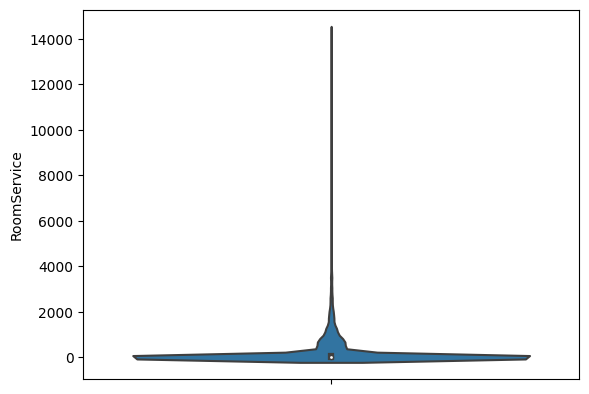

In [9]:
sns.violinplot(y='RoomService', data=train_df)
train_df['RoomService'].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

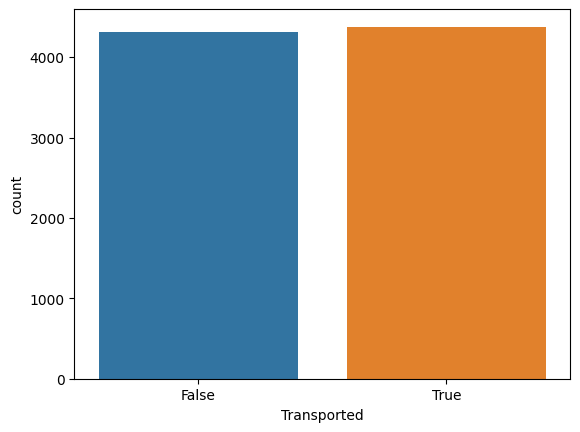

In [10]:

sns.countplot(x='Transported', data=train_df)
train_df['Transported'].value_counts()

In [11]:
train_df['Transported'] = train_df['Transported'].astype(float)

Age
24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: count, Length: 80, dtype: int64

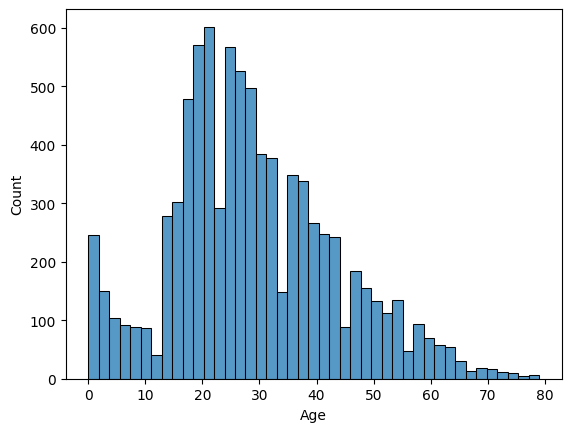

In [12]:
sns.histplot(x='Age', data=train_df, )
train_df['Age'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

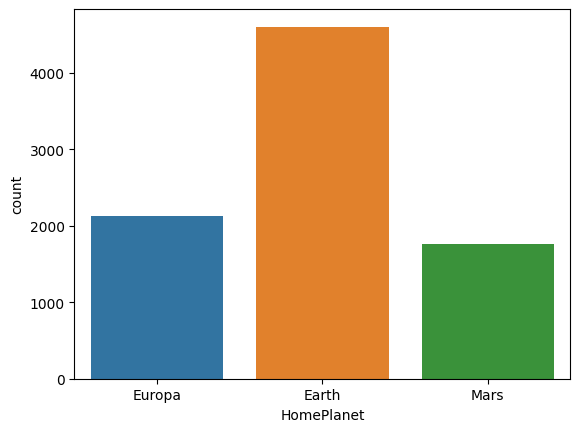

In [13]:
sns.countplot(x='HomePlanet', data=train_df)
train_df['HomePlanet'].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

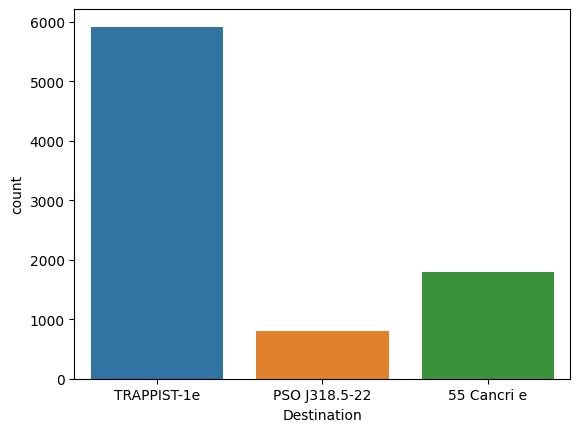

In [14]:
sns.countplot(x='Destination', data=train_df)
train_df['Destination'].value_counts()

In [15]:
train_df.isnull()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,False,False,False,False,False,False,False,False,False,False,False,False,False
0002_01,False,False,False,False,False,False,False,False,False,False,False,False,False
0003_01,False,False,False,False,False,False,False,False,False,False,False,False,False
0003_02,False,False,False,False,False,False,False,False,False,False,False,False,False
0004_01,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,False,False,False,False,False,False,False,False,False,False,False,False,False
9278_01,False,False,False,False,False,False,False,False,False,False,False,False,False
9279_01,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
train_df.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [17]:
train_df.isnull().any(axis=1).value_counts()

False    6606
True     2087
Name: count, dtype: int64

In [18]:
dir(missingno)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'bar',
 'dendrogram',
 'heatmap',
 'matrix',
 'missingno',
 'nullity_filter',
 'nullity_sort',
 'utils']

<Axes: >

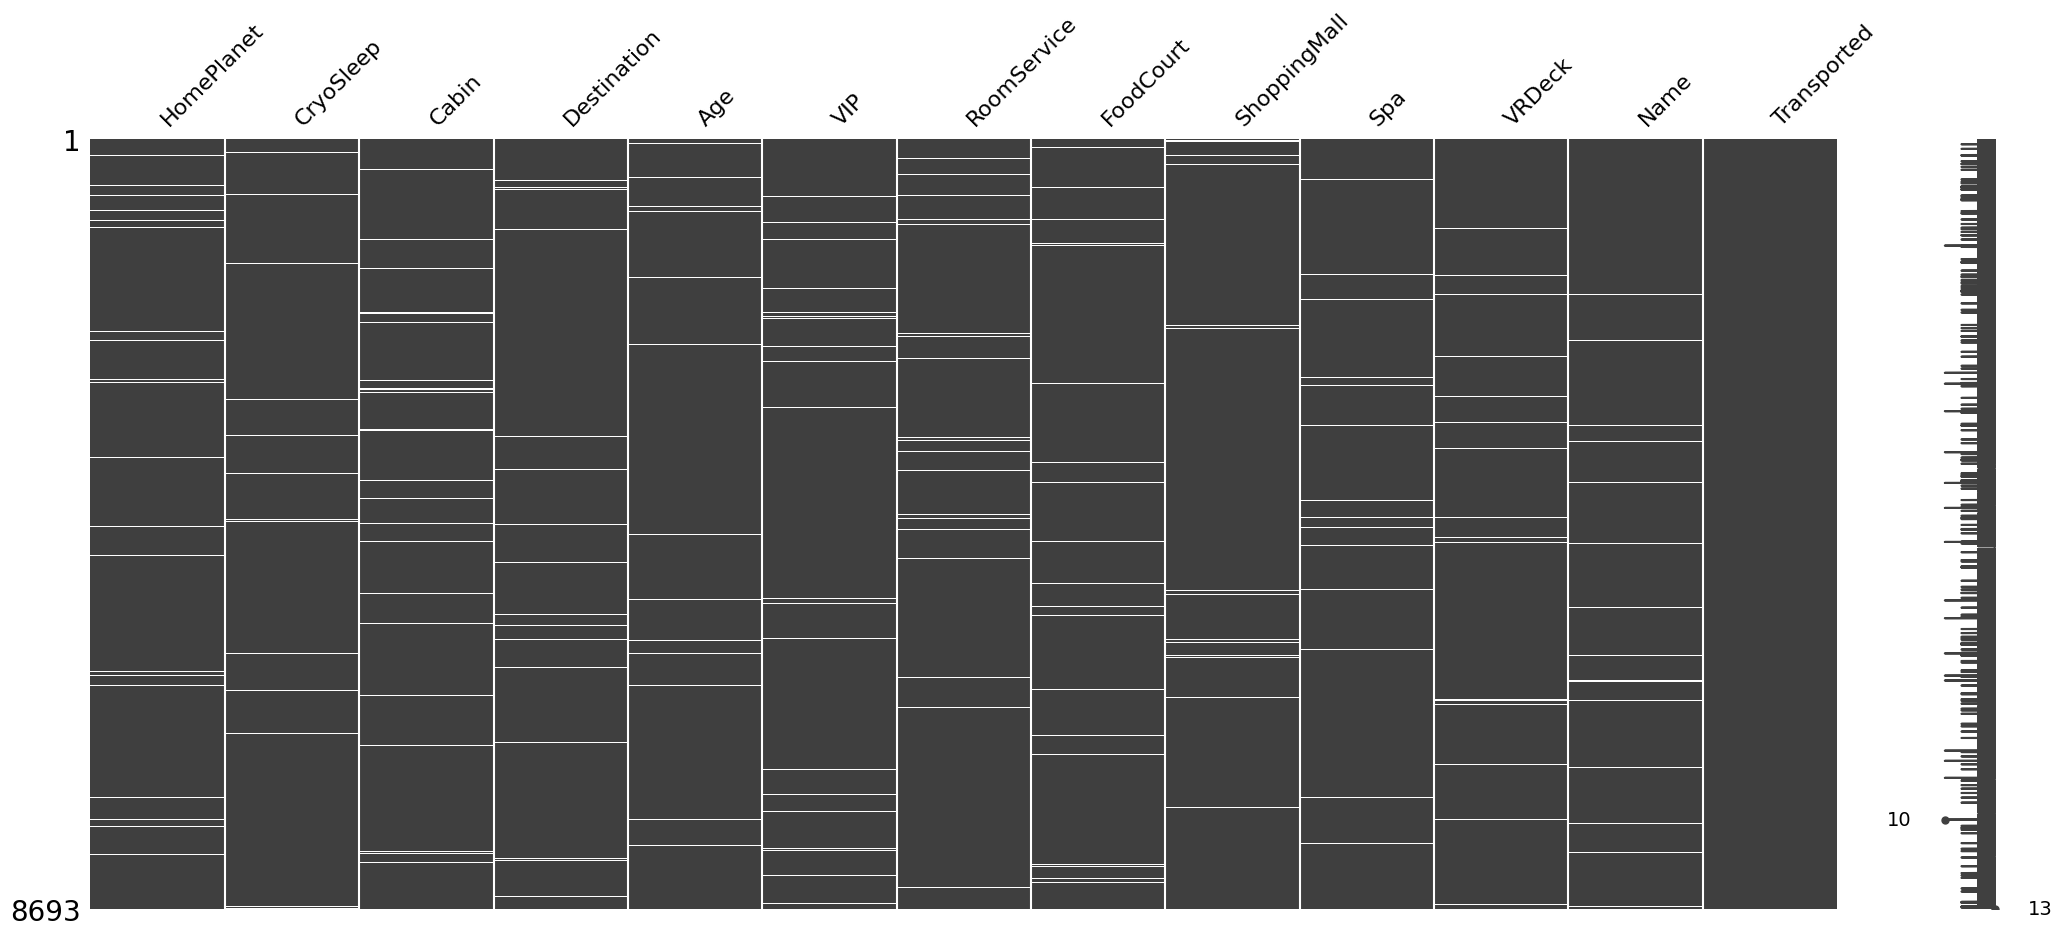

In [19]:
missingno.matrix(train_df)

missingno.bar(train_df)

<Axes: >

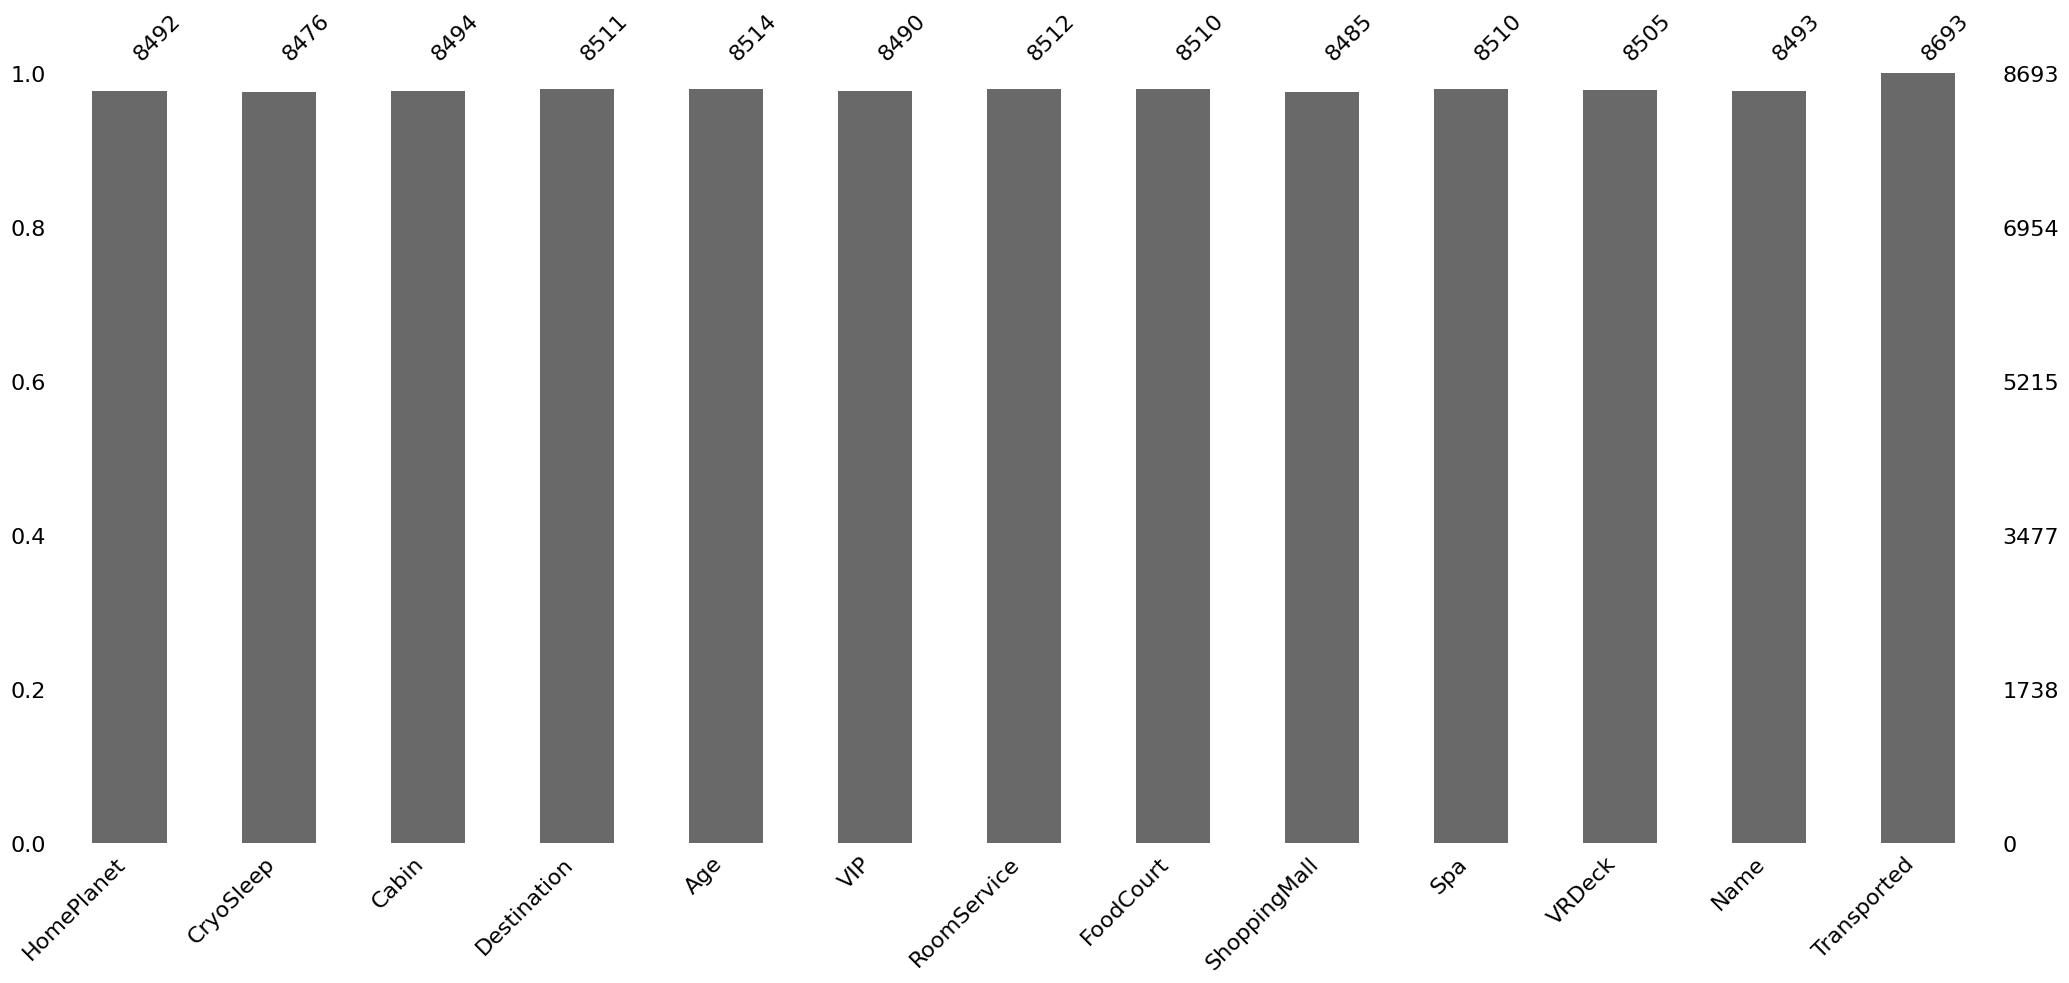

In [20]:
missingno.bar(train_df)

In [21]:
train_df[train_df['Age'].isnull()]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0052_01,Earth,0.0,G/6/S,TRAPPIST-1e,NaN,0.0,4.0,0.0,2.0,4683.0,0.0,Elaney Hubbarton,0.0
0068_01,Mars,0.0,E/4/S,TRAPPIST-1e,NaN,0.0,793.0,0.0,2.0,253.0,0.0,Cinst Binie,0.0
0149_01,Earth,1.0,G/27/S,55 Cancri e,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Billya Hubbarrison,1.0
0202_02,Europa,0.0,A/2/P,55 Cancri e,NaN,0.0,0.0,2433.0,NaN,878.0,443.0,Vegas Embleng,1.0
0206_01,Europa,0.0,C/9/S,55 Cancri e,NaN,0.0,2.0,1720.0,12.0,1125.0,122.0,Nuson Brugashed,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8835_01,Earth,1.0,G/1425/S,TRAPPIST-1e,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Shalle Bartines,0.0
8862_03,Europa,1.0,C/329/S,TRAPPIST-1e,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Alchib Myling,1.0
8956_04,Earth,0.0,G/1453/P,TRAPPIST-1e,NaN,0.0,194.0,1.0,10.0,629.0,0.0,Krisa Bonnondry,0.0


In [22]:
train_df[train_df['RoomService'].isnull()]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0020_05,Earth,1.0,E/0/S,PSO J318.5-22,1.0,0.0,NaN,0.0,0.0,0.0,0.0,Mael Brantuarez,0.0
0031_03,Mars,0.0,F/9/P,TRAPPIST-1e,20.0,0.0,NaN,0.0,1750.0,990.0,0.0,Dontch Datie,1.0
0091_01,Earth,1.0,G/16/S,TRAPPIST-1e,26.0,0.0,NaN,0.0,0.0,0.0,0.0,Deanne Yorkland,1.0
0141_01,Mars,0.0,F/30/P,TRAPPIST-1e,31.0,0.0,NaN,0.0,97.0,0.0,0.0,Pyrohs Harte,0.0
0193_02,Mars,0.0,F/41/P,TRAPPIST-1e,23.0,0.0,NaN,0.0,8.0,1072.0,0.0,Frook Raf,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8998_02,Earth,0.0,E/591/S,TRAPPIST-1e,47.0,0.0,NaN,1.0,0.0,967.0,5.0,Jonaye Englence,0.0
9026_01,Earth,1.0,G/1463/P,TRAPPIST-1e,58.0,0.0,NaN,0.0,0.0,0.0,0.0,Mathy Boyers,1.0
9101_01,Earth,0.0,F/1865/P,TRAPPIST-1e,21.0,0.0,NaN,0.0,496.0,430.0,0.0,Gera Frazie,0.0


In [23]:
train_df[train_df['VIP'].isnull()]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0036_01,Earth,0.0,F/8/S,55 Cancri e,15.0,NaN,0.0,492.0,48.0,20.0,401.0,Marina Leodger,0.0
0108_03,Earth,0.0,G/19/S,TRAPPIST-1e,0.0,NaN,0.0,0.0,0.0,0.0,0.0,Oline Handertiz,1.0
0165_01,Mars,1.0,F/37/P,TRAPPIST-1e,35.0,NaN,0.0,0.0,0.0,0.0,0.0,Graven Anche,1.0
0244_02,Mars,1.0,F/47/S,55 Cancri e,14.0,NaN,0.0,0.0,0.0,0.0,0.0,Tous Sad,1.0
0593_01,Mars,0.0,D/24/P,TRAPPIST-1e,NaN,NaN,43.0,152.0,182.0,1.0,2005.0,Hon Kra,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9074_01,Earth,1.0,G/1460/S,TRAPPIST-1e,0.0,NaN,0.0,0.0,NaN,0.0,0.0,Adamie Trerady,1.0
9081_06,Earth,0.0,F/1858/P,PSO J318.5-22,16.0,NaN,0.0,0.0,761.0,0.0,0.0,Daryla Clemondsey,0.0
9122_01,Earth,1.0,G/1469/S,55 Cancri e,55.0,NaN,0.0,0.0,0.0,0.0,0.0,Paulas Schmondez,0.0


In [24]:
data_df = pd.concat([train_df, test_df], axis=0)

In [25]:
data_df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0
0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0
0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0
0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0
0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN


In [26]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0001_01 to 9277_01
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12682 non-null  object 
 1   CryoSleep     12660 non-null  object 
 2   Cabin         12671 non-null  object 
 3   Destination   12696 non-null  object 
 4   Age           12700 non-null  float64
 5   VIP           12674 non-null  object 
 6   RoomService   12707 non-null  float64
 7   FoodCourt     12681 non-null  float64
 8   ShoppingMall  12664 non-null  float64
 9   Spa           12686 non-null  float64
 10  VRDeck        12702 non-null  float64
 11  Name          12676 non-null  object 
 12  Transported   8693 non-null   float64
dtypes: float64(7), object(6)
memory usage: 1.4+ MB


<Axes: >

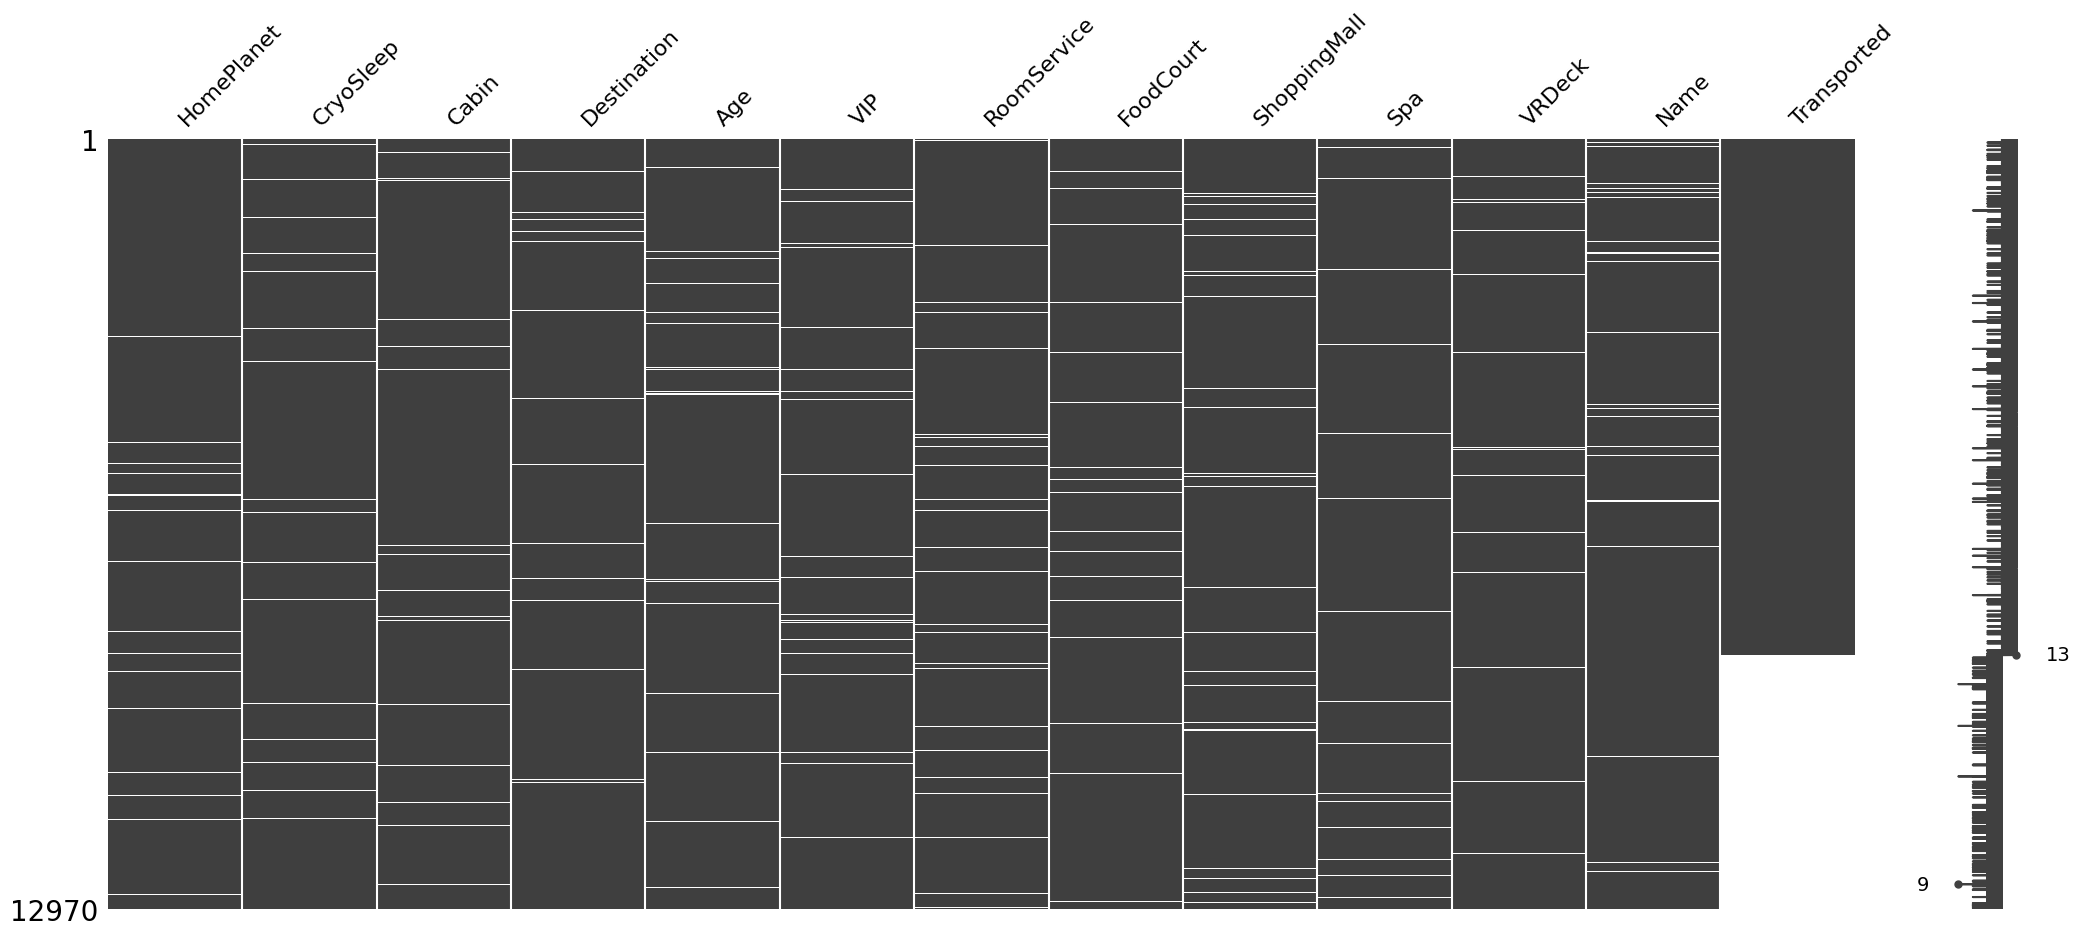

In [27]:
missingno.matrix(data_df)

In [28]:
num_cols = ['VIP', 'RoomService', 'Spa', 'Age', 'VRDeck', 'FoodCourt']

<Axes: >

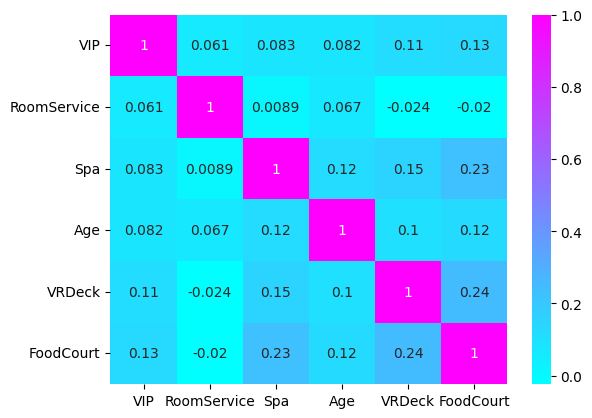

In [29]:
sns.heatmap(data=data_df[num_cols].corr(), annot=True, cmap='cool')

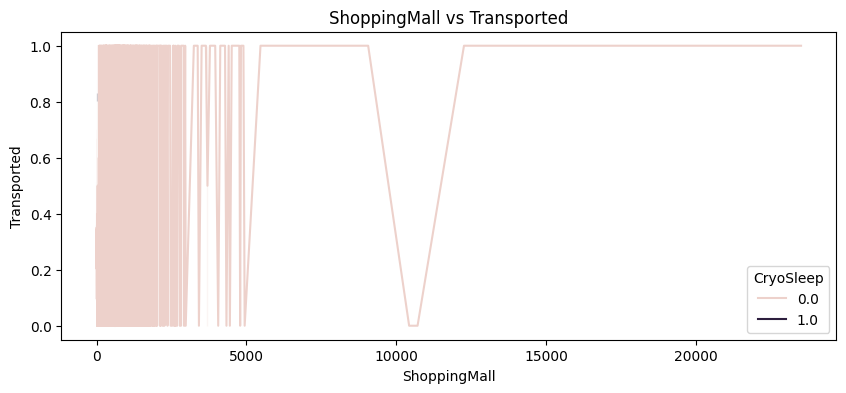

,CryoSleep,Age,VIP,RoomService,FoodCourt,Spa,VRDeck,Transported
ShoppingMall,,,,,,,,
0.0,0.540327,27.611457,0.019813,111.090843,442.209256,285.414581,293.025407,0.598711
1.0,0.000000,33.304636,0.033784,382.602649,724.456954,691.520270,512.264901,0.241830
2.0,0.000000,32.626667,0.012658,382.912500,913.871795,599.893333,417.325000,0.237500
3.0,0.000000,31.258621,0.068966,401.508475,1049.428571,534.775862,576.350877,0.305085
4.0,0.000000,28.888889,0.046512,598.886364,487.162791,394.866667,331.613636,0.200000
...,...,...,...,...,...,...,...,...
9058.0,0.000000,36.000000,0.000000,0.000000,1828.000000,1.000000,2.000000,1.000000
10424.0,0.000000,26.000000,0.000000,0.000000,21.000000,1373.000000,7218.000000,0.000000
10705.0,0.000000,41.000000,0.000000,0.000000,116.000000,9181.000000,10.000000,0.000000


In [30]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,4))
sns.lineplot(data=train_df, x='ShoppingMall', y='Transported', hue='CryoSleep', ax=ax)
plt.title('ShoppingMall vs Transported')
plt.show()
train_df.groupby(by='ShoppingMall').mean(numeric_only=True)

In [31]:
train_df.groupby(by='ShoppingMall').count()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,Spa,VRDeck,Name,Transported
ShoppingMall,,,,,,,,,,,,
0.0,5453,5443,5441,5476,5464,5451,5471,5467,5473,5471,5457,5587
1.0,153,149,153,151,151,148,151,151,148,151,153,153
2.0,78,77,76,78,75,79,80,78,75,80,79,80
3.0,58,55,59,57,58,58,59,56,58,57,58,59
4.0,44,44,45,45,45,43,44,43,45,44,44,45
...,...,...,...,...,...,...,...,...,...,...,...,...
9058.0,1,1,1,1,1,1,1,1,1,1,1,1
10424.0,1,1,1,1,1,1,1,1,1,1,1,1
10705.0,1,1,1,1,1,1,1,1,1,1,1,1


,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
CryoSleep,,,,,,,,
0.0,29.651319,0.032907,350.146772,713.004316,270.586504,486.09294,475.716165,0.328921
1.0,27.405415,0.007090,0.000000,0.000000,0.000000,0.00000,0.000000,0.817583


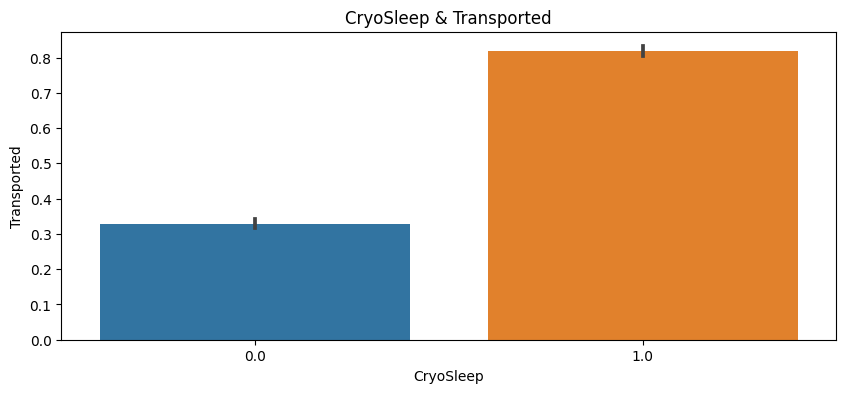

In [32]:
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
sns.barplot(data= train_df, x='CryoSleep', y='Transported', ax=ax)
plt.title("CryoSleep & Transported")
train_df.groupby(by='CryoSleep').mean(numeric_only=True)

In [33]:
train_df.groupby(by='CryoSleep').count()

,HomePlanet,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
CryoSleep,,,,,,,,,,,,
0.0,5315,5331,5309,5343,5318,5328,5329,5335,5326,5320,5311,5439
1.0,2962,2953,2989,2955,2962,2969,2967,2941,2972,2975,2975,3037


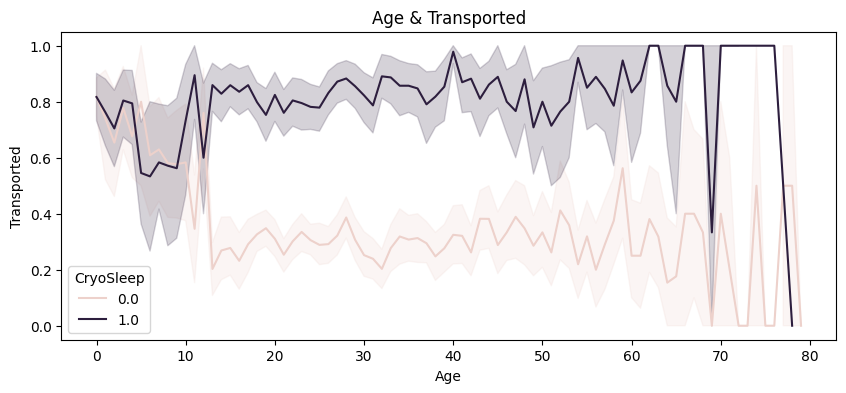

,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,,,,,,,,
0.0,0.405714,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.808989
1.0,0.646154,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.731343
2.0,0.628571,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.706667
3.0,0.630137,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.786667
4.0,0.500000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.746479
...,...,...,...,...,...,...,...,...
75.0,0.500000,0.0,0.000000,123.25,306.000000,43.666667,475.250000,0.500000
76.0,0.500000,0.0,0.000000,1366.00,211.000000,8297.000000,165.000000,0.500000
77.0,0.000000,0.0,0.000000,9032.00,65.500000,2054.500000,786.000000,0.500000


In [34]:
fig,ax=plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
sns.lineplot(data=train_df,x='Age',y='Transported',hue='CryoSleep',ax=ax)
plt.title('Age & Transported')
plt.show()
train_df.groupby(by='Age').mean(numeric_only=True)

In [35]:
train_df.groupby(by='Age').count()

,HomePlanet,CryoSleep,Cabin,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
Age,,,,,,,,,,,,
0.0,175,175,175,175,172,174,176,172,175,173,172,178
1.0,67,65,65,66,67,65,67,64,65,66,66,67
2.0,73,70,73,74,74,70,74,72,75,72,71,75
3.0,73,73,74,75,71,75,74,73,73,75,74,75
4.0,70,68,70,71,70,70,65,71,69,69,70,71
...,...,...,...,...,...,...,...,...,...,...,...,...
75.0,4,4,3,4,4,4,4,4,3,4,4,4
76.0,2,2,2,2,2,2,2,2,2,2,2,2
77.0,2,2,2,2,2,2,1,2,2,2,2,2


In [36]:
train_df.groupby(by='VIP').count()

,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
VIP,,,,,,,,,,,,
0.0,8098,8084,8104,8115,8119,8118,8118,8092,8112,8108,8095,8291
1.0,194,196,193,197,198,195,193,194,197,195,196,199


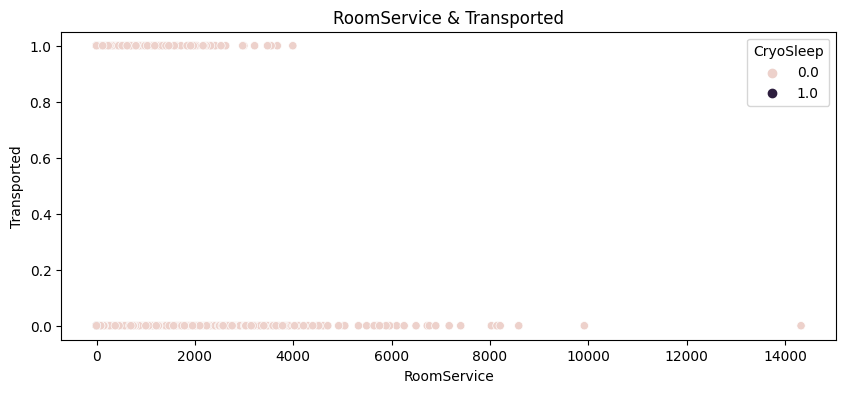

,CryoSleep,Age,VIP,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
RoomService,,,,,,,,
0.0,0.546475,27.543287,0.018165,433.652254,105.080912,286.019210,284.484587,0.633315
1.0,0.000000,31.145299,0.043478,943.333333,257.241071,487.344828,679.017699,0.341880
2.0,0.000000,31.760000,0.038961,1387.243590,254.820513,538.526316,590.539474,0.405063
3.0,0.000000,30.983333,0.050000,717.016949,219.933333,757.688525,638.448276,0.393443
4.0,0.000000,29.377778,0.000000,673.822222,407.000000,600.391304,386.021739,0.191489
...,...,...,...,...,...,...,...,...
8209.0,0.000000,39.000000,NaN,18.000000,432.000000,3560.000000,54.000000,0.000000
8243.0,NaN,31.000000,1.000000,280.000000,0.000000,3220.000000,2285.000000,0.000000
8586.0,0.000000,26.000000,0.000000,77.000000,114.000000,29.000000,4.000000,0.000000


In [37]:
fig,ax=plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
sns.scatterplot(data=train_df,x='RoomService',y='Transported',hue='CryoSleep',ax=ax)
plt.title('RoomService & Transported')
plt.show()
train_df.groupby(by='RoomService').mean(numeric_only=True)

In [38]:
train_df.groupby(by='RoomService').count()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
RoomService,,,,,,,,,,,,
0.0,5442,5433,5447,5469,5452,5450,5458,5438,5466,5450,5446,5577
1.0,116,115,116,111,117,115,114,112,116,113,115,117
2.0,77,79,79,78,75,77,78,78,76,76,76,79
3.0,59,59,58,58,60,60,59,60,61,58,60,61
4.0,46,46,46,45,45,47,45,47,46,46,46,47
...,...,...,...,...,...,...,...,...,...,...,...,...
8209.0,1,1,1,1,1,0,1,1,1,1,1,1
8243.0,1,0,1,1,1,1,1,1,1,1,1,1
8586.0,1,1,1,1,1,1,1,1,1,1,1,1


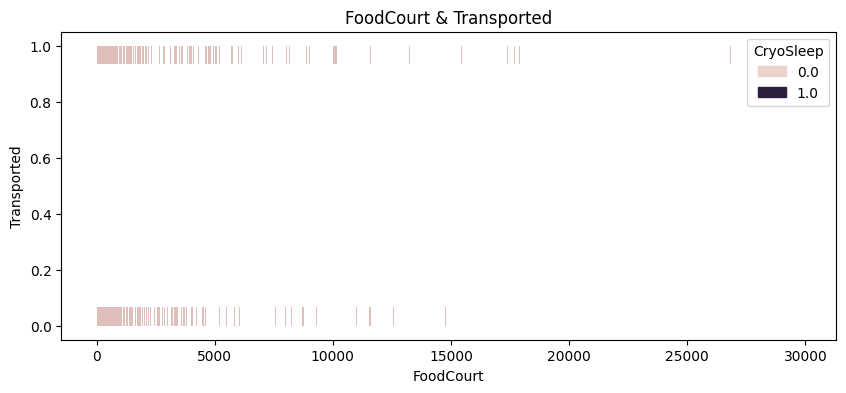

,CryoSleep,Age,VIP,RoomService,ShoppingMall,Spa,VRDeck,Transported
FoodCourt,,,,,,,,
0.0,0.557602,26.784391,0.012568,191.497661,133.406480,91.334454,78.000000,0.590909
1.0,0.000000,30.640351,0.008850,397.400000,315.640351,389.696429,242.526786,0.224138
2.0,0.000000,30.890411,0.000000,512.115942,212.791667,369.928571,567.250000,0.213333
3.0,0.000000,29.686275,0.000000,305.730769,291.326923,351.576923,330.211538,0.188679
4.0,0.000000,30.230769,0.039216,572.588235,228.811321,346.415094,282.538462,0.207547
...,...,...,...,...,...,...,...,...
21066.0,0.000000,27.000000,0.000000,NaN,0.000000,2448.000000,2293.000000,1.000000
26830.0,0.000000,33.000000,0.000000,90.000000,0.000000,27.000000,703.000000,1.000000
27071.0,0.000000,33.000000,0.000000,0.000000,0.000000,15.000000,0.000000,1.000000


In [39]:
fig,ax=plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
sns.histplot(data=train_df,x='FoodCourt',y='Transported',hue='CryoSleep',ax=ax)
plt.title('FoodCourt & Transported')
plt.show()
train_df.groupby(by='FoodCourt').mean(numeric_only=True)

In [40]:
train_df.groupby(by='FoodCourt').count()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,ShoppingMall,Spa,VRDeck,Name,Transported
FoodCourt,,,,,,,,,,,,
0.0,5330,5321,5328,5346,5343,5331,5345,5309,5352,5338,5330,5456
1.0,111,113,113,115,114,113,110,114,112,112,114,116
2.0,74,73,72,70,73,73,69,72,70,72,73,75
3.0,49,52,52,51,51,53,52,52,52,52,51,53
4.0,50,52,50,50,52,51,51,53,53,52,51,53
...,...,...,...,...,...,...,...,...,...,...,...,...
21066.0,1,1,1,1,1,1,0,1,1,1,1,1
26830.0,1,1,1,1,1,1,1,1,1,1,1,1
27071.0,1,1,1,1,1,1,1,1,1,1,1,1


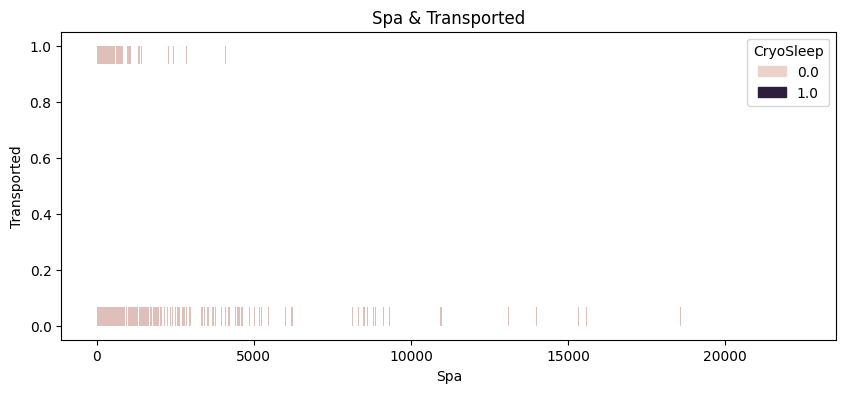

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,VRDeck,Transported
Spa,,,,,,,,
0.0,0.57264,26.726854,0.014624,157.740315,121.745590,118.065612,113.904349,0.639181
1.0,0.00000,30.110345,0.034965,695.062937,872.528169,397.612676,490.517241,0.356164
2.0,0.00000,32.230000,0.019802,477.019417,987.166667,310.096154,372.152381,0.447619
3.0,0.00000,35.037736,0.038462,300.320755,1121.358491,412.588235,722.705882,0.452830
4.0,0.00000,31.111111,0.043478,686.760870,776.000000,283.565217,563.627907,0.369565
...,...,...,...,...,...,...,...,...
15586.0,0.00000,33.000000,0.000000,0.000000,2107.000000,0.000000,473.000000,0.000000
16139.0,0.00000,19.000000,0.000000,0.000000,1291.000000,0.000000,687.000000,0.000000
16594.0,0.00000,76.000000,0.000000,0.000000,2732.000000,422.000000,330.000000,0.000000


In [41]:
fig,ax=plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
sns.histplot(data=train_df,x='Spa',y='Transported',hue='CryoSleep',ax=ax)
plt.title('Spa & Transported')
plt.show()
train_df.groupby(by='Spa').mean(numeric_only=True)

In [42]:
train_df.groupby(by='Spa').count()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,VRDeck,Name,Transported
Spa,,,,,,,,,,,,
0.0,5202,5190,5191,5216,5206,5197,5214,5216,5182,5196,5201,5324
1.0,140,140,143,143,145,143,143,142,142,145,143,146
2.0,103,100,104,103,100,101,103,102,104,105,103,105
3.0,52,53,53,51,53,52,53,53,51,51,52,53
4.0,44,46,46,45,45,46,46,43,46,43,45,46
...,...,...,...,...,...,...,...,...,...,...,...,...
15586.0,1,1,1,0,1,1,1,1,1,1,1,1
16139.0,1,1,1,1,1,1,1,1,1,1,1,1
16594.0,1,1,1,1,1,1,1,1,1,1,1,1


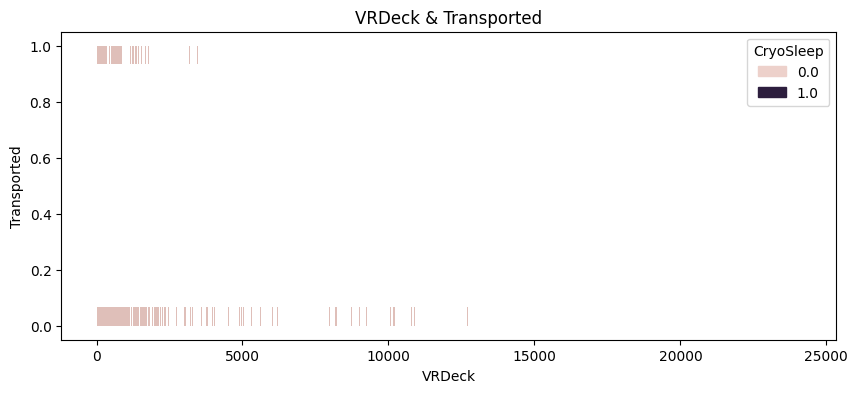

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,Transported
VRDeck,,,,,,,,
0.0,0.555452,26.997208,0.014376,193.931869,120.710115,134.638381,108.602307,0.628025
1.0,0.000000,30.956204,0.014599,363.992701,840.455224,272.507246,707.432836,0.338129
2.0,0.000000,31.357143,0.057971,535.579710,844.528571,505.378788,401.928571,0.414286
3.0,0.000000,30.927273,0.017857,293.945455,484.690909,859.200000,539.000000,0.303571
4.0,0.000000,34.068182,0.043478,538.234043,948.911111,266.978261,869.340426,0.404255
...,...,...,...,...,...,...,...,...
16337.0,0.000000,36.000000,0.000000,43.000000,2.000000,0.000000,14.000000,0.000000
17074.0,0.000000,60.000000,0.000000,0.000000,960.000000,46.000000,854.000000,0.000000
17306.0,0.000000,36.000000,0.000000,29.000000,12180.000000,0.000000,93.000000,0.000000


In [43]:
fig,ax=plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
sns.histplot(data=train_df,x='VRDeck',y='Transported',hue='CryoSleep',ax=ax)
plt.title('VRDeck & Transported')
plt.show()
train_df.groupby(by='VRDeck').mean(numeric_only=True)

In [44]:
train_df.groupby(by='VRDeck').count()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,Name,Transported
VRDeck,,,,,,,,,,,,
0.0,5358,5356,5367,5389,5373,5356,5372,5378,5362,5376,5368,5495
1.0,138,139,135,136,137,137,137,134,138,134,133,139
2.0,68,67,68,68,70,69,69,70,66,70,69,70
3.0,56,55,56,54,55,56,55,55,55,56,54,56
4.0,47,45,45,47,44,46,47,45,46,47,47,47
...,...,...,...,...,...,...,...,...,...,...,...,...
16337.0,1,1,1,1,1,1,1,1,1,1,1,1
17074.0,1,1,1,1,1,1,1,1,1,1,1,1
17306.0,1,1,1,1,1,1,1,1,1,1,1,1


In [45]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   float64
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   float64
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   float64
dtypes: float64(9), object(4)
memory usage: 1.2+ MB


In [46]:
data_df['CryoSleep'].fillna(data_df['CryoSleep'].mean(), inplace=True)
data_df['Spa'].fillna(data_df['Spa'].mean(), inplace=True)
data_df['FoodCourt'].fillna(data_df['FoodCourt'].mean(), inplace=True)
data_df['RoomService'].fillna(data_df['RoomService'].mean(), inplace=True)
data_df['VRDeck'].fillna(data_df['VRDeck'].mean(), inplace=True)
data_df['ShoppingMall'].fillna(data_df['ShoppingMall'].mean(), inplace=True)
data_df['VIP'].fillna(data_df['VIP'].mean(), inplace=True)
data_df['HomePlanet'].fillna('Earth', inplace=True)
data_df['Destination'].fillna('TRAPPIST-1e', inplace=True)

In [47]:
data_df.drop(['Name', 'Age', 'Cabin'],axis=1, inplace=True)

In [48]:
data_df

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
PassengerId,,,,,,,,,,
0001_01,Europa,0.0,TRAPPIST-1e,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002_01,Earth,0.0,TRAPPIST-1e,0.0,109.0,9.0,25.0,549.0,44.0,1.0
0003_01,Europa,0.0,TRAPPIST-1e,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0
0003_02,Europa,0.0,TRAPPIST-1e,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0
0004_01,Earth,0.0,TRAPPIST-1e,0.0,303.0,70.0,151.0,565.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,TRAPPIST-1e,False,0.0,0.0,0.0,0.0,0.0,NaN
9269_01,Earth,False,TRAPPIST-1e,False,0.0,847.0,17.0,10.0,144.0,NaN
9271_01,Mars,True,55 Cancri e,False,0.0,0.0,0.0,0.0,0.0,NaN


In [49]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0001_01 to 9277_01
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12970 non-null  object 
 1   CryoSleep     12970 non-null  object 
 2   Destination   12970 non-null  object 
 3   VIP           12970 non-null  object 
 4   RoomService   12970 non-null  float64
 5   FoodCourt     12970 non-null  float64
 6   ShoppingMall  12970 non-null  float64
 7   Spa           12970 non-null  float64
 8   VRDeck        12970 non-null  float64
 9   Transported   8693 non-null   float64
dtypes: float64(6), object(4)
memory usage: 1.1+ MB


In [50]:
cat_cols = ['Destination', 'CryoSleep', 'VIP', 'HomePlanet']

In [51]:
data_oh = pd.get_dummies(data_df, columns = cat_cols, dtype=int)

In [52]:
data_oh

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_0.0,CryoSleep_0.3618483412322275,CryoSleep_1.0,VIP_0.0,VIP_0.021540160959444533,VIP_1.0,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
PassengerId,,,,,,,,,,,,,,,,,,
0001_01,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,1,0,0,0,1,0
0002_01,109.0,9.0,25.0,549.0,44.0,1.0,0,0,1,1,0,0,1,0,0,1,0,0
0003_01,43.0,3576.0,0.0,6715.0,49.0,0.0,0,0,1,1,0,0,0,0,1,0,1,0
0003_02,0.0,1283.0,371.0,3329.0,193.0,0.0,0,0,1,1,0,0,1,0,0,0,1,0
0004_01,303.0,70.0,151.0,565.0,2.0,1.0,0,0,1,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,0.0,0.0,0.0,0.0,0.0,NaN,0,0,1,0,0,1,1,0,0,1,0,0
9269_01,0.0,847.0,17.0,10.0,144.0,NaN,0,0,1,1,0,0,1,0,0,1,0,0
9271_01,0.0,0.0,0.0,0.0,0.0,NaN,1,0,0,0,0,1,1,0,0,0,0,1


In [53]:
num_cols = ['FoodCourt', 'RoomService', 'Spa', 'VRDeck', 'ShoppingMall']
data_oh[num_cols].describe()

,FoodCourt,RoomService,Spa,VRDeck,ShoppingMall
count,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000
mean,451.961675,222.897852,308.476904,306.789482,174.906033
std,1566.618306,640.996685,1117.835494,1167.840416,583.550067
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,126.000000,79.000000,87.000000,64.000000,47.000000
max,29813.000000,14327.000000,22408.000000,24133.000000,23492.000000


In [54]:
data_std = data_oh.copy()

In [55]:
scaler = StandardScaler()

In [56]:
data_std[num_cols] = scaler.fit_transform(data_std[num_cols])

In [57]:
data_std

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_0.0,CryoSleep_0.3618483412322275,CryoSleep_1.0,VIP_0.0,VIP_0.021540160959444533,VIP_1.0,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
PassengerId,,,,,,,,,,,,,,,,,,
0001_01,-0.347750,-0.288506,-0.299739,-0.275970,-0.262708,0.0,0,0,1,1,0,0,1,0,0,0,1,0
0002_01,-0.177696,-0.282761,-0.256896,0.215177,-0.225030,1.0,0,0,1,1,0,0,1,0,0,1,0,0
0003_01,-0.280664,1.994205,-0.299739,5.731407,-0.220749,0.0,0,0,1,1,0,0,0,0,1,0,1,0
0003_02,-0.347750,0.530487,0.336049,2.702222,-0.097440,0.0,0,0,1,1,0,0,1,0,0,0,1,0
0004_01,0.124970,-0.243822,-0.040968,0.229491,-0.260996,1.0,0,0,1,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,-0.347750,-0.288506,-0.299739,-0.275970,-0.262708,NaN,0,0,1,0,0,1,1,0,0,1,0,0
9269_01,-0.347750,0.252170,-0.270606,-0.267024,-0.139399,NaN,0,0,1,1,0,0,1,0,0,1,0,0
9271_01,-0.347750,-0.288506,-0.299739,-0.275970,-0.262708,NaN,1,0,0,0,0,1,1,0,0,0,0,1


In [58]:
data_oh

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_0.0,CryoSleep_0.3618483412322275,CryoSleep_1.0,VIP_0.0,VIP_0.021540160959444533,VIP_1.0,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
PassengerId,,,,,,,,,,,,,,,,,,
0001_01,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,1,0,0,0,1,0
0002_01,109.0,9.0,25.0,549.0,44.0,1.0,0,0,1,1,0,0,1,0,0,1,0,0
0003_01,43.0,3576.0,0.0,6715.0,49.0,0.0,0,0,1,1,0,0,0,0,1,0,1,0
0003_02,0.0,1283.0,371.0,3329.0,193.0,0.0,0,0,1,1,0,0,1,0,0,0,1,0
0004_01,303.0,70.0,151.0,565.0,2.0,1.0,0,0,1,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,0.0,0.0,0.0,0.0,0.0,NaN,0,0,1,0,0,1,1,0,0,1,0,0
9269_01,0.0,847.0,17.0,10.0,144.0,NaN,0,0,1,1,0,0,1,0,0,1,0,0
9271_01,0.0,0.0,0.0,0.0,0.0,NaN,1,0,0,0,0,1,1,0,0,0,0,1


In [59]:
data_std[num_cols].describe()

,FoodCourt,RoomService,Spa,VRDeck,ShoppingMall
count,1.297000e+04,1.297000e+04,1.297000e+04,1.297000e+04,1.297000e+04
mean,1.588723e-17,-1.424372e-17,1.260022e-17,-6.217934e-17,6.574027e-18
std,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00
min,-2.885062e-01,-3.477498e-01,-2.759698e-01,-2.627082e-01,-2.997391e-01
25%,-2.885062e-01,-3.477498e-01,-2.759698e-01,-2.627082e-01,-2.997391e-01
50%,-2.885062e-01,-3.477498e-01,-2.759698e-01,-2.627082e-01,-2.997391e-01
75%,-2.080751e-01,-2.244994e-01,-1.981378e-01,-2.079041e-01,-2.191945e-01
max,1.874239e+01,2.200424e+01,1.977069e+01,2.040273e+01,3.995886e+01


In [60]:
data_oh[num_cols].describe()

,FoodCourt,RoomService,Spa,VRDeck,ShoppingMall
count,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000
mean,451.961675,222.897852,308.476904,306.789482,174.906033
std,1566.618306,640.996685,1117.835494,1167.840416,583.550067
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,126.000000,79.000000,87.000000,64.000000,47.000000
max,29813.000000,14327.000000,22408.000000,24133.000000,23492.000000


In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
data_norm = data_oh.copy()

In [63]:
scaler = MinMaxScaler()
data_norm[num_cols] = scaler.fit_transform(data_norm[num_cols])

In [64]:
data_norm[num_cols].describe()

,FoodCourt,RoomService,Spa,VRDeck,ShoppingMall
count,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000
mean,0.015160,0.015558,0.013766,0.012712,0.007445
std,0.052548,0.044740,0.049886,0.048392,0.024840
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.004226,0.005514,0.003883,0.002652,0.002001
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
train = data_std[0:len(train_df)]
test = data_std[len(train_df):]

In [66]:
train

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_0.0,CryoSleep_0.3618483412322275,CryoSleep_1.0,VIP_0.0,VIP_0.021540160959444533,VIP_1.0,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
PassengerId,,,,,,,,,,,,,,,,,,
0001_01,-0.347750,-0.288506,-0.299739,-0.275970,-0.262708,0.0,0,0,1,1,0,0,1,0,0,0,1,0
0002_01,-0.177696,-0.282761,-0.256896,0.215177,-0.225030,1.0,0,0,1,1,0,0,1,0,0,1,0,0
0003_01,-0.280664,1.994205,-0.299739,5.731407,-0.220749,0.0,0,0,1,1,0,0,0,0,1,0,1,0
0003_02,-0.347750,0.530487,0.336049,2.702222,-0.097440,0.0,0,0,1,1,0,0,1,0,0,0,1,0
0004_01,0.124970,-0.243822,-0.040968,0.229491,-0.260996,1.0,0,0,1,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,-0.347750,4.064349,-0.299739,1.193892,-0.199341,0.0,1,0,0,1,0,0,0,0,1,0,1,0
9278_01,-0.347750,-0.288506,-0.299739,-0.275970,-0.262708,0.0,0,1,0,0,0,1,1,0,0,1,0,0
9279_01,-0.347750,-0.288506,2.908336,-0.275075,-0.262708,1.0,0,0,1,1,0,0,1,0,0,1,0,0


In [67]:
test.drop('Transported', axis=1, inplace=True)

/tmp/ipykernel_18/1188870485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('Transported', axis=1, inplace=True)


In [68]:
test

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_0.0,CryoSleep_0.3618483412322275,CryoSleep_1.0,VIP_0.0,VIP_0.021540160959444533,VIP_1.0,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
PassengerId,,,,,,,,,,,,,,,,,
0013_01,-0.347750,-0.288506,-0.299739,-0.275970,-0.262708,0,0,1,0,0,1,1,0,0,1,0,0
0018_01,-0.347750,-0.282761,-0.299739,2.249544,-0.262708,0,0,1,1,0,0,1,0,0,1,0,0
0019_01,-0.347750,-0.288506,-0.299739,-0.275970,-0.262708,1,0,0,0,0,1,1,0,0,0,1,0
0021_01,-0.347750,3.957746,-0.299739,-0.114043,0.238236,0,0,1,1,0,0,1,0,0,0,1,0
0023_01,-0.332148,-0.288506,0.788470,-0.275970,-0.262708,0,0,1,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,-0.347750,-0.288506,-0.299739,-0.275970,-0.262708,0,0,1,0,0,1,1,0,0,1,0,0
9269_01,-0.347750,0.252170,-0.270606,-0.267024,-0.139399,0,0,1,1,0,0,1,0,0,1,0,0
9271_01,-0.347750,-0.288506,-0.299739,-0.275970,-0.262708,1,0,0,0,0,1,1,0,0,0,0,1


In [69]:
train

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_0.0,CryoSleep_0.3618483412322275,CryoSleep_1.0,VIP_0.0,VIP_0.021540160959444533,VIP_1.0,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
PassengerId,,,,,,,,,,,,,,,,,,
0001_01,-0.347750,-0.288506,-0.299739,-0.275970,-0.262708,0.0,0,0,1,1,0,0,1,0,0,0,1,0
0002_01,-0.177696,-0.282761,-0.256896,0.215177,-0.225030,1.0,0,0,1,1,0,0,1,0,0,1,0,0
0003_01,-0.280664,1.994205,-0.299739,5.731407,-0.220749,0.0,0,0,1,1,0,0,0,0,1,0,1,0
0003_02,-0.347750,0.530487,0.336049,2.702222,-0.097440,0.0,0,0,1,1,0,0,1,0,0,0,1,0
0004_01,0.124970,-0.243822,-0.040968,0.229491,-0.260996,1.0,0,0,1,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,-0.347750,4.064349,-0.299739,1.193892,-0.199341,0.0,1,0,0,1,0,0,0,0,1,0,1,0
9278_01,-0.347750,-0.288506,-0.299739,-0.275970,-0.262708,0.0,0,1,0,0,0,1,1,0,0,1,0,0
9279_01,-0.347750,-0.288506,2.908336,-0.275075,-0.262708,1.0,0,0,1,1,0,0,1,0,0,1,0,0


In [70]:
y = train['Transported']
X = train.drop(['Transported'], axis=1)

In [71]:
X

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_0.0,CryoSleep_0.3618483412322275,CryoSleep_1.0,VIP_0.0,VIP_0.021540160959444533,VIP_1.0,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
PassengerId,,,,,,,,,,,,,,,,,
0001_01,-0.347750,-0.288506,-0.299739,-0.275970,-0.262708,0,0,1,1,0,0,1,0,0,0,1,0
0002_01,-0.177696,-0.282761,-0.256896,0.215177,-0.225030,0,0,1,1,0,0,1,0,0,1,0,0
0003_01,-0.280664,1.994205,-0.299739,5.731407,-0.220749,0,0,1,1,0,0,0,0,1,0,1,0
0003_02,-0.347750,0.530487,0.336049,2.702222,-0.097440,0,0,1,1,0,0,1,0,0,0,1,0
0004_01,0.124970,-0.243822,-0.040968,0.229491,-0.260996,0,0,1,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,-0.347750,4.064349,-0.299739,1.193892,-0.199341,1,0,0,1,0,0,0,0,1,0,1,0
9278_01,-0.347750,-0.288506,-0.299739,-0.275970,-0.262708,0,1,0,0,0,1,1,0,0,1,0,0
9279_01,-0.347750,-0.288506,2.908336,-0.275075,-0.262708,0,0,1,1,0,0,1,0,0,1,0,0


In [72]:
y

PassengerId
0001_01    0.0
0002_01    1.0
0003_01    0.0
0003_02    0.0
0004_01    1.0
          ... 
9276_01    0.0
9278_01    0.0
9279_01    1.0
9280_01    0.0
9280_02    1.0
Name: Transported, Length: 8693, dtype: float64

In [73]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RoomService                   8693 non-null   float64
 1   FoodCourt                     8693 non-null   float64
 2   ShoppingMall                  8693 non-null   float64
 3   Spa                           8693 non-null   float64
 4   VRDeck                        8693 non-null   float64
 5   Destination_55 Cancri e       8693 non-null   int64  
 6   Destination_PSO J318.5-22     8693 non-null   int64  
 7   Destination_TRAPPIST-1e       8693 non-null   int64  
 8   CryoSleep_0.0                 8693 non-null   int64  
 9   CryoSleep_0.3618483412322275  8693 non-null   int64  
 10  CryoSleep_1.0                 8693 non-null   int64  
 11  VIP_0.0                       8693 non-null   int64  
 12  VIP_0.021540160959444533      8693 non-null   int64  
 13 

In [74]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [75]:
kfold = KFold(n_splits=5, shuffle=False)
for tr_idx, vl_idx in kfold.split(X):
    print(vl_idx)

[   0    1    2 ... 1736 1737 1738]
[1739 1740 1741 ... 3475 3476 3477]
[3478 3479 3480 ... 5214 5215 5216]
[5217 5218 5219 ... 6952 6953 6954]
[6955 6956 6957 ... 8690 8691 8692]


In [76]:
kfold = KFold(n_splits=5, shuffle=True, random_state=9)
for tr_idx, val_idx in kfold.split(X):
    print(vl_idx)

[6955 6956 6957 ... 8690 8691 8692]
[6955 6956 6957 ... 8690 8691 8692]
[6955 6956 6957 ... 8690 8691 8692]
[6955 6956 6957 ... 8690 8691 8692]
[6955 6956 6957 ... 8690 8691 8692]


In [77]:
for tr_idx, val_idx in kfold.split(X):
    X_tr, y_tr = X.iloc[tr_idx], y.iloc[tr_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]
    
    model = LogisticRegression()
    model.fit(X_tr, y_tr)
    
    y_pred = model.predict(X_val)
    
    score = accuracy_score(y_pred, y_val)
    
    print(score)

0.7768832662449684
0.7855089131684876
0.7929844738355377
0.7796317606444189
0.8107019562715765


In [78]:
print(X_tr)
print('----')
print(y_tr)
print('----')
print(X_val)
print('----')
print(y_val)


             RoomService  FoodCourt  ShoppingMall       Spa    VRDeck  \
PassengerId                                                             
0002_01        -0.177696  -0.282761     -0.256896  0.215177 -0.225030   
0003_01        -0.280664   1.994205     -0.299739  5.731407 -0.220749   
0004_01         0.124970  -0.243822     -0.040968  0.229491 -0.260996   
0005_01        -0.347750   0.019813     -0.299739 -0.015635 -0.262708   
0006_01        -0.282224   0.693902     -0.294598 -0.275970 -0.262708   
...                  ...        ...           ...       ...       ...   
9276_01        -0.347750   4.064349     -0.299739  1.193892 -0.199341   
9278_01        -0.347750  -0.288506     -0.299739 -0.275970 -0.262708   
9279_01        -0.347750  -0.288506      2.908336 -0.275075 -0.262708   
9280_01        -0.347750   0.381115     -0.299739  0.039831  2.507469   
9280_02        -0.151173   2.704042     -0.299739 -0.275970 -0.252432   

             Destination_55 Cancri e  Destination_

In [79]:
val_score = np.zeros(5, float)
print(val_score)
for i, (tr_idx, val_idx) in enumerate(kfold.split(X)):
    X_tr, y_tr = X.iloc[tr_idx], y.iloc[tr_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]
    
    model = LogisticRegression()
    model.fit(X_tr, y_tr)
    
    y_pred = model.predict(X_val)
    
    score = accuracy_score(y_val, y_pred)
    
    val_score[i] = score
    
    print(f"iteration{i}, score = {score}")
    

[0. 0. 0. 0. 0.]
iteration0, score = 0.7768832662449684
iteration1, score = 0.7855089131684876
iteration2, score = 0.7929844738355377
iteration3, score = 0.7796317606444189
iteration4, score = 0.8107019562715765


In [80]:
val_score

array([0.77688327, 0.78550891, 0.79298447, 0.77963176, 0.81070196])

In [81]:
val_score.mean(), val_score.std()

(0.7891420740329977, 0.012112116622491563)

In [82]:
X_test = test

In [83]:
sub_df = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv',index_col="PassengerId")

In [84]:
sub_df['Total'] = 0

In [85]:
sub_df

,Transported,Total
PassengerId,,
0013_01,False,0
0018_01,False,0
0019_01,False,0
0021_01,False,0
0023_01,False,0
...,...,...
9266_02,False,0
9269_01,False,0
9271_01,False,0


In [86]:
for i, (tr_idx, val_idx) in enumerate(kfold.split(X)):
    X_tr, y_tr = X.iloc[tr_idx], y.iloc[tr_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]
    
    model = LogisticRegression()
    model.fit(X_tr, y_tr)
    
    pred = model.predict(X_test)

    
    sub_df[f"fold{i+1}"] = pred
    sub_df['Total'] += pred

In [87]:
sub_df

,Transported,Total,fold1,fold2,fold3,fold4,fold5
PassengerId,,,,,,,
0013_01,False,5.0,1.0,1.0,1.0,1.0,1.0
0018_01,False,0.0,0.0,0.0,0.0,0.0,0.0
0019_01,False,5.0,1.0,1.0,1.0,1.0,1.0
0021_01,False,5.0,1.0,1.0,1.0,1.0,1.0
0023_01,False,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
9266_02,False,5.0,1.0,1.0,1.0,1.0,1.0
9269_01,False,0.0,0.0,0.0,0.0,0.0,0.0
9271_01,False,5.0,1.0,1.0,1.0,1.0,1.0


In [88]:
sub_df['Total'].value_counts()

Total
5.0    2177
0.0    1954
1.0      74
4.0      36
2.0      21
3.0      15
Name: count, dtype: int64

In [89]:
sub_df['Transported'] = sub_df['Total'].apply(lambda x:1 if x > 2.5 else 0)

In [90]:
sub_df

,Transported,Total,fold1,fold2,fold3,fold4,fold5
PassengerId,,,,,,,
0013_01,1,5.0,1.0,1.0,1.0,1.0,1.0
0018_01,0,0.0,0.0,0.0,0.0,0.0,0.0
0019_01,1,5.0,1.0,1.0,1.0,1.0,1.0
0021_01,1,5.0,1.0,1.0,1.0,1.0,1.0
0023_01,0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
9266_02,1,5.0,1.0,1.0,1.0,1.0,1.0
9269_01,0,0.0,0.0,0.0,0.0,0.0,0.0
9271_01,1,5.0,1.0,1.0,1.0,1.0,1.0


In [91]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0013_01 to 9277_01
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Transported  4277 non-null   int64  
 1   Total        4277 non-null   float64
 2   fold1        4277 non-null   float64
 3   fold2        4277 non-null   float64
 4   fold3        4277 non-null   float64
 5   fold4        4277 non-null   float64
 6   fold5        4277 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 267.3+ KB


In [92]:
sub_df['Transported'] = sub_df['Transported'].astype(bool)

In [93]:
sub_df['Transported']

PassengerId
0013_01     True
0018_01    False
0019_01     True
0021_01     True
0023_01    False
           ...  
9266_02     True
9269_01    False
9271_01     True
9273_01     True
9277_01     True
Name: Transported, Length: 4277, dtype: bool

In [94]:
sub_df['Transported'].value_counts()

Transported
True     2228
False    2049
Name: count, dtype: int64

In [95]:
sub_df['Transported'].to_csv('submission.csv')